Import Library requirements for project

In [2]:
# ============================================
# IMPORTS
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("✓ Libraries loaded")

✓ Libraries loaded


Load data base

In [3]:
# ============================================
# DATA LOADING
# ============================================
df = pd.read_excel('donnees_immobilieres_extended.xlsx')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst rows:")
display(df.head())

print(f"\nData types:")
display(df.dtypes)

print(f"\nMissing values:")
display(df.isnull().sum())

Dataset shape: (150, 12)

First rows:


,ID,Surface_m2,Chambres,Annee_construction,Distance_centre_km,Etage,Ascenseur,Annee_vente,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
0,1,139.87,3,1982,21.33,2,1,2023,1.1,47.5,11.9,1961.68
1,2,114.47,4,1991,2.90,5,1,2022,4.7,44.2,11.9,2303.67
2,3,145.91,2,2005,3.00,3,1,2017,3.2,53.8,10.7,2224.12
3,4,180.92,4,1995,29.61,3,1,2022,6.1,68.3,11.1,2425.63
4,5,110.63,3,2016,11.54,0,0,2021,9.0,81.9,10.8,2323.34



Data types:


ID                          int64
Surface_m2                float64
Chambres                    int64
Annee_construction          int64
Distance_centre_km        float64
Etage                       int64
Ascenseur                   int64
Annee_vente                 int64
Qualite_ecole             float64
Revenu_median_quartier    float64
Distance_universite       float64
Prix_milliers_euros       float64
dtype: object


Missing values:


ID                        0
Surface_m2                0
Chambres                  0
Annee_construction        0
Distance_centre_km        0
Etage                     0
Ascenseur                 0
Annee_vente               0
Qualite_ecole             0
Revenu_median_quartier    0
Distance_universite       0
Prix_milliers_euros       0
dtype: int64

DESCRIPTIVE STATISTICS

In [4]:

# Basic stats for all numeric variables
stats_desc = df.describe().T
stats_desc['median'] = df.median()
stats_desc['skewness'] = df.skew()
stats_desc['kurtosis'] = df.kurtosis()

# Reorder columns
cols_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']
stats_desc = stats_desc[cols_order]

print("="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)
display(stats_desc)

# Detailed analysis of dependent variable: Price
print("\n" + "="*80)
print("PRICE ANALYSIS (DEPENDENT VARIABLE)")
print("="*80)

precio_stats = {
    'Mean': df['Prix_milliers_euros'].mean(),
    'Median': df['Prix_milliers_euros'].median(),
    'Std Dev': df['Prix_milliers_euros'].std(),
    'Min': df['Prix_milliers_euros'].min(),
    'Max': df['Prix_milliers_euros'].max(),
    'Q1 (25%)': df['Prix_milliers_euros'].quantile(0.25),
    'Q3 (75%)': df['Prix_milliers_euros'].quantile(0.75),
    'IQR': df['Prix_milliers_euros'].quantile(0.75) - df['Prix_milliers_euros'].quantile(0.25),
    'Skewness': df['Prix_milliers_euros'].skew(),
    'Kurtosis': df['Prix_milliers_euros'].kurtosis()
}

for key, value in precio_stats.items():
    print(f"{key:15s}: {value:10.2f}")

# Interpretation
print("\n" + "-"*80)
print("INTERPRETATION:")
print("-"*80)

skew = precio_stats['Skewness']
kurt = precio_stats['Kurtosis']

# Skewness interpretation
if abs(skew) < 0.5:
    print(f"• Skewness = {skew:.2f} → Approximately SYMMETRIC")
elif skew > 0.5:
    print(f"• Skewness = {skew:.2f} → POSITIVE SKEW (right tail)")
    print("  → Few expensive houses pulling mean up")
    print("  → CONSIDER log transformation")
else:
    print(f"• Skewness = {skew:.2f} → NEGATIVE SKEW (left tail)")

# Kurtosis interpretation
if abs(kurt - 3) < 0.5:
    print(f"• Kurtosis = {kurt:.2f} → Normal-like distribution")
elif kurt > 3:
    print(f"• Kurtosis = {kurt:.2f} → LEPTOKURTIC (peaked, more outliers)")
else:
    print(f"• Kurtosis = {kurt:.2f} → PLATYKURTIC (flat)")

DESCRIPTIVE STATISTICS


,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
ID,150.0,75.50,75.50,43.45,1.00,38.25,75.50,112.75,150.00,0.00,-1.20
Surface_m2,150.0,116.71,117.84,37.69,15.21,93.24,117.84,139.64,218.53,0.05,-0.11
Chambres,150.0,2.89,3.00,1.08,1.00,2.00,3.00,4.00,5.00,0.10,-0.69
Annee_construction,150.0,2001.83,2002.50,11.70,1980.00,1991.00,2002.50,2012.00,2022.00,-0.08,-1.17
Distance_centre_km,150.0,16.50,16.87,9.02,0.83,9.11,16.87,24.70,29.99,-0.14,-1.19
Etage,150.0,2.58,2.50,1.76,0.00,1.00,2.50,4.00,5.00,-0.01,-1.34
Ascenseur,150.0,0.46,0.00,0.50,0.00,0.00,0.00,1.00,1.00,0.16,-2.00
Annee_vente,150.0,2019.84,2020.00,2.29,2015.00,2018.00,2020.00,2022.00,2023.00,-0.32,-1.01
Qualite_ecole,150.0,5.47,5.60,1.87,1.00,4.12,5.60,7.00,10.00,-0.15,-0.50
Revenu_median_quartier,150.0,63.67,63.45,9.30,42.90,57.50,63.45,70.47,83.90,0.05,-0.58



PRICE ANALYSIS (DEPENDENT VARIABLE)
Mean           :    2107.90
Median         :    2105.05
Std Dev        :     229.92
Min            :    1500.77
Max            :    2743.04
Q1 (25%)       :    1934.29
Q3 (75%)       :    2272.78
IQR            :     338.49
Skewness       :       0.16
Kurtosis       :      -0.47

--------------------------------------------------------------------------------
INTERPRETATION:
--------------------------------------------------------------------------------
• Skewness = 0.16 → Approximately SYMMETRIC
• Kurtosis = -0.47 → PLATYKURTIC (flat)


# ============================================
# SECTION 1.1 - VISUALIZATIONS
# ============================================

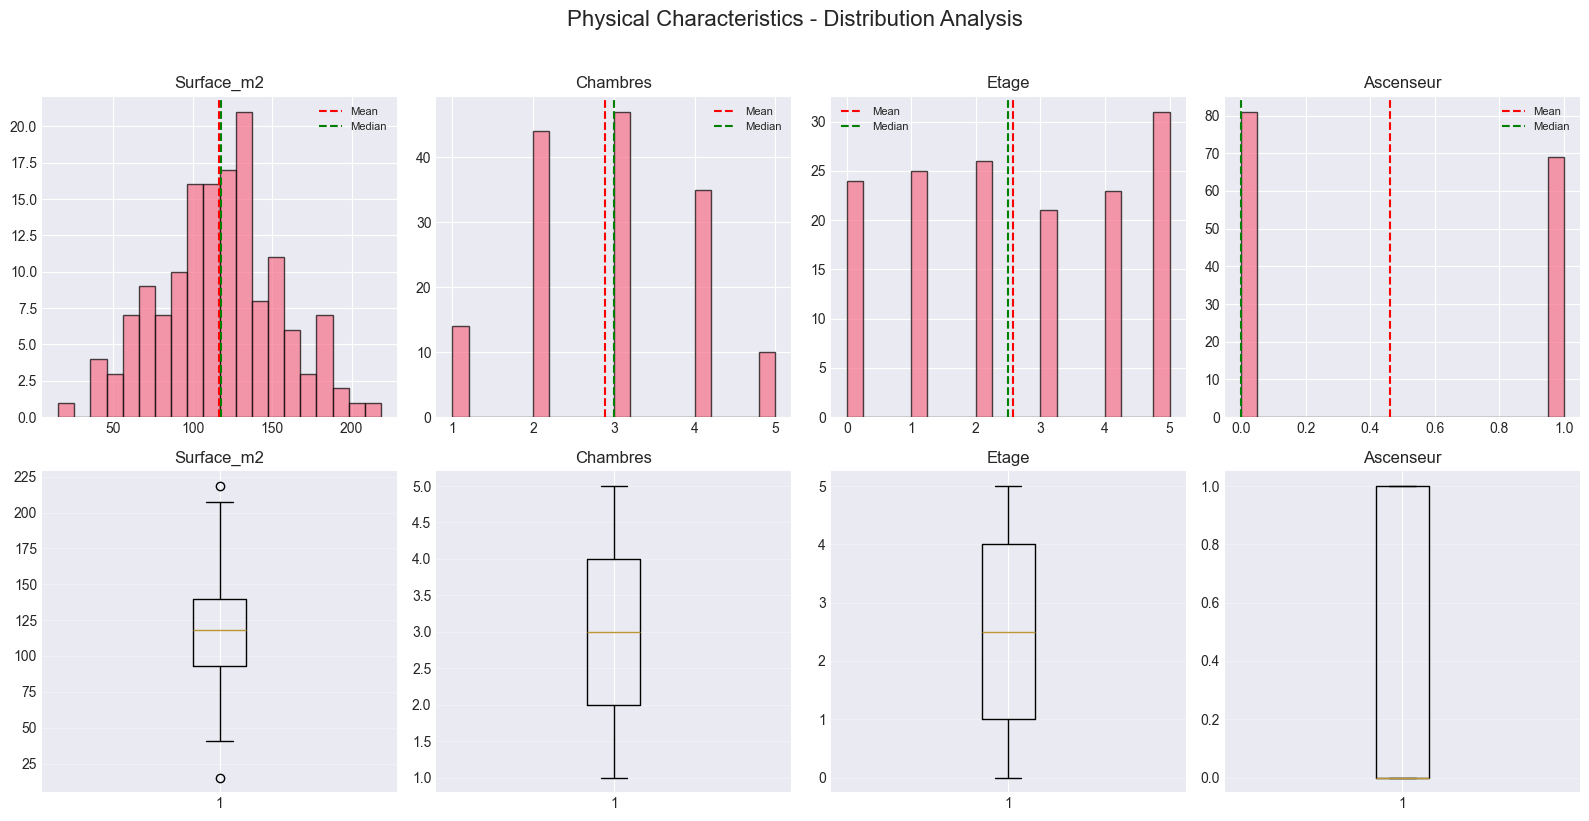

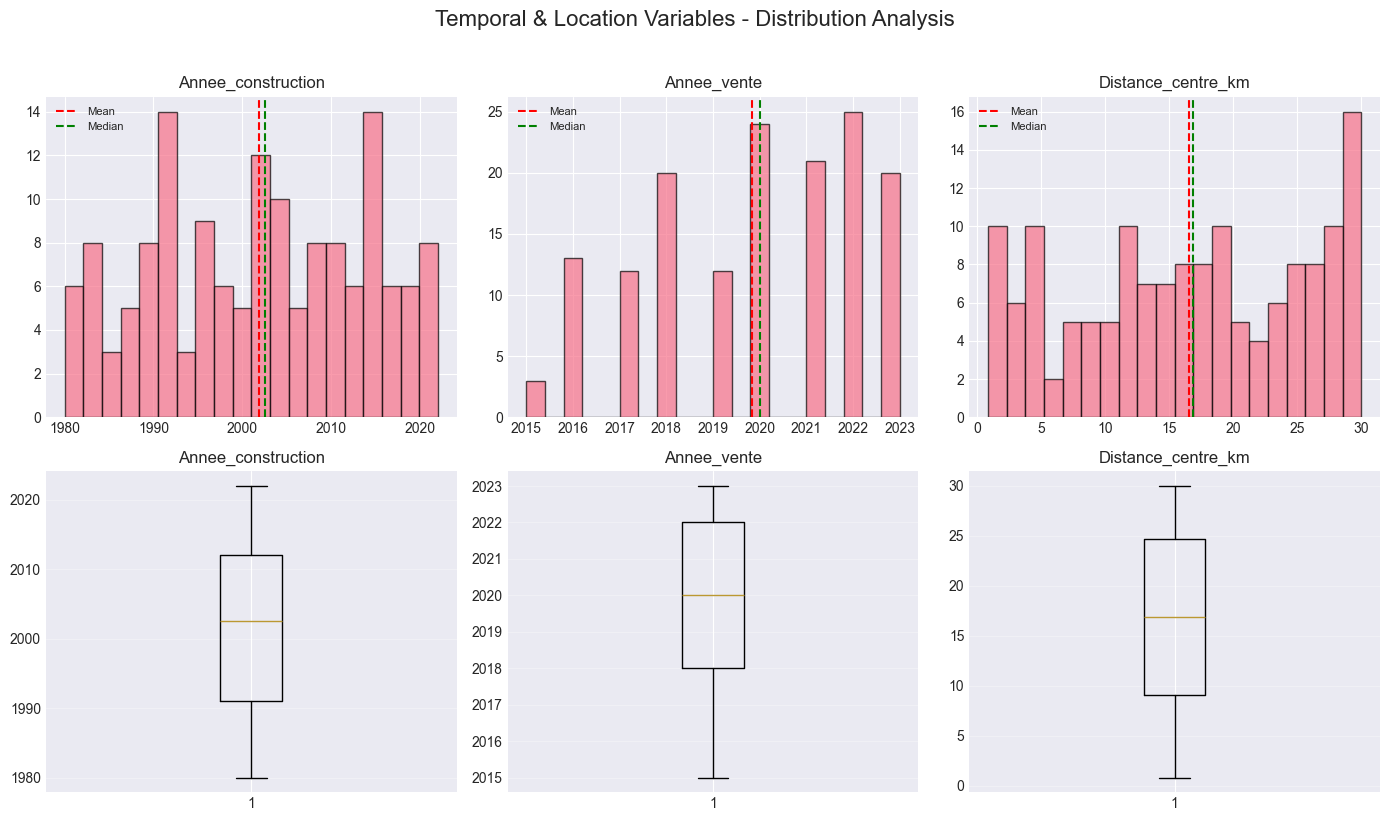

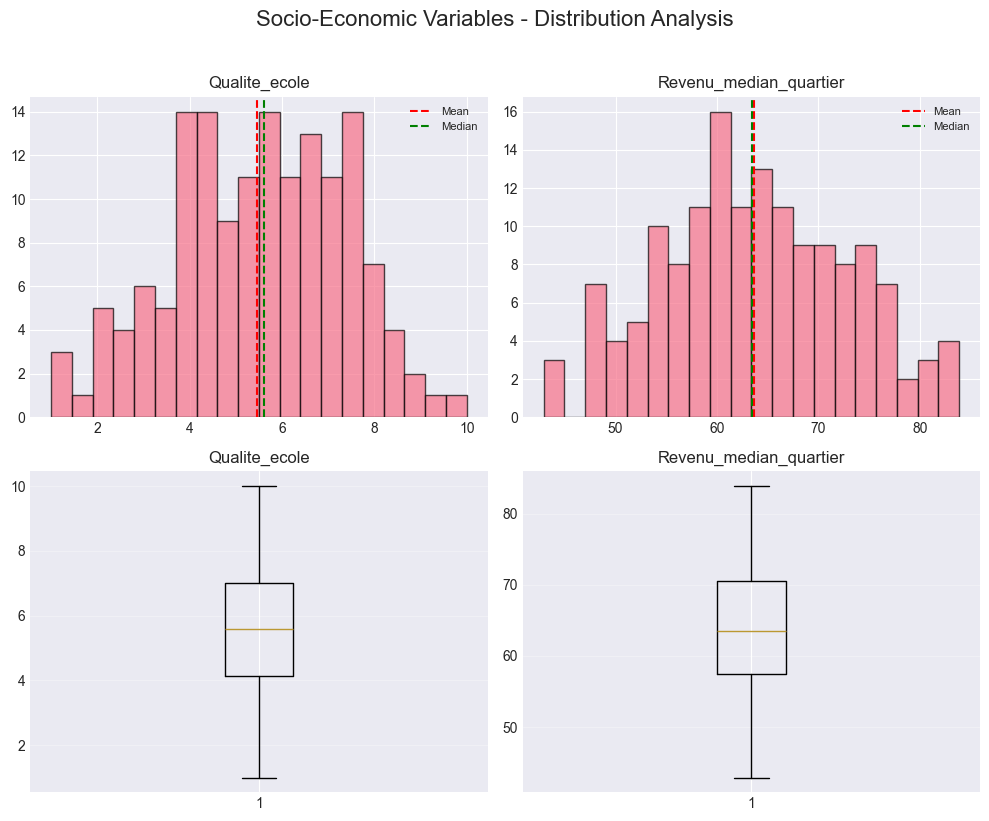

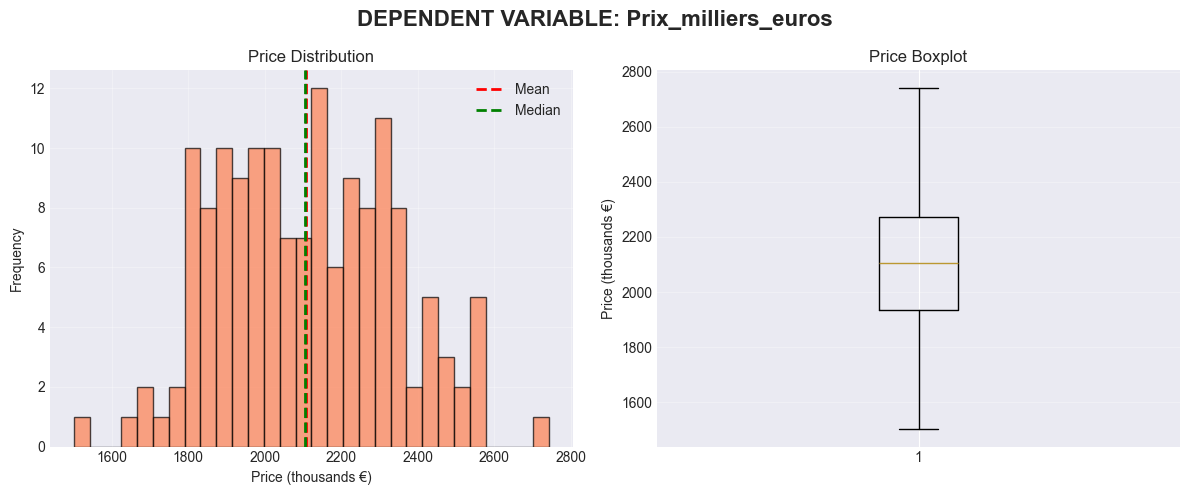

In [5]:

# Group 1: Physical characteristics
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Physical Characteristics - Distribution Analysis', fontsize=16, y=1.02)

physical_vars = ['Surface_m2', 'Chambres', 'Etage', 'Ascenseur']

for i, var in enumerate(physical_vars):
    # Histogram
    axes[0, i].hist(df[var], bins=20, edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f'{var}')
    axes[0, i].set_xlabel('')
    axes[0, i].axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
    axes[0, i].axvline(df[var].median(), color='green', linestyle='--', label='Median')
    axes[0, i].legend(fontsize=8)
    
    # Boxplot
    axes[1, i].boxplot(df[var], vert=True)
    axes[1, i].set_title(f'{var}')
    axes[1, i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Group 2: Temporal and location
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle('Temporal & Location Variables - Distribution Analysis', fontsize=16, y=1.02)

temporal_vars = ['Annee_construction', 'Annee_vente', 'Distance_centre_km']

for i, var in enumerate(temporal_vars):
    # Histogram
    axes[0, i].hist(df[var], bins=20, edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f'{var}')
    axes[0, i].set_xlabel('')
    axes[0, i].axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
    axes[0, i].axvline(df[var].median(), color='green', linestyle='--', label='Median')
    axes[0, i].legend(fontsize=8)
    
    # Boxplot
    axes[1, i].boxplot(df[var], vert=True)
    axes[1, i].set_title(f'{var}')
    axes[1, i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Group 3: Socio-economic
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Socio-Economic Variables - Distribution Analysis', fontsize=16, y=1.02)

socio_vars = ['Qualite_ecole', 'Revenu_median_quartier']

for i, var in enumerate(socio_vars):
    # Histogram
    axes[0, i].hist(df[var], bins=20, edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f'{var}')
    axes[0, i].set_xlabel('')
    axes[0, i].axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
    axes[0, i].axvline(df[var].median(), color='green', linestyle='--', label='Median')
    axes[0, i].legend(fontsize=8)
    
    # Boxplot
    axes[1, i].boxplot(df[var], vert=True)
    axes[1, i].set_title(f'{var}')
    axes[1, i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Group 4: DEPENDENT VARIABLE - Price (special attention)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('DEPENDENT VARIABLE: Prix_milliers_euros', fontsize=16, fontweight='bold')

# Histogram
axes[0].hist(df['Prix_milliers_euros'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price (thousands €)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['Prix_milliers_euros'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(df['Prix_milliers_euros'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df['Prix_milliers_euros'], vert=True)
axes[1].set_title('Price Boxplot')
axes[1].set_ylabel('Price (thousands €)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# SECTION 1.2 - CORRELATION ANALYSIS
# ============================================

CORRELATION MATRIX


,Surface_m2,Chambres,Annee_construction,Distance_centre_km,Etage,Ascenseur,Annee_vente,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
Surface_m2,1.00,0.59,-0.03,-0.07,0.06,-0.06,0.06,0.04,0.01,-0.09,0.83
Chambres,0.59,1.00,0.04,-0.10,0.05,-0.01,0.04,-0.01,0.01,-0.09,0.61
Annee_construction,-0.03,0.04,1.00,-0.09,-0.04,-0.10,-0.06,-0.01,0.03,-0.01,0.07
Distance_centre_km,-0.07,-0.10,-0.09,1.00,0.02,0.08,0.08,0.04,0.11,-0.06,-0.31
Etage,0.06,0.05,-0.04,0.02,1.00,-0.08,0.13,-0.03,0.04,0.08,0.13
Ascenseur,-0.06,-0.01,-0.10,0.08,-0.08,1.00,-0.08,0.06,0.08,-0.06,0.04
Annee_vente,0.06,0.04,-0.06,0.08,0.13,-0.08,1.00,0.02,0.01,0.03,0.24
Qualite_ecole,0.04,-0.01,-0.01,0.04,-0.03,0.06,0.02,1.00,0.60,-0.44,0.25
Revenu_median_quartier,0.01,0.01,0.03,0.11,0.04,0.08,0.01,0.60,1.00,-0.30,0.21
Distance_universite,-0.09,-0.09,-0.01,-0.06,0.08,-0.06,0.03,-0.44,-0.30,1.00,-0.12



CORRELATION WITH PRICE (sorted by absolute value)


Prix_milliers_euros       1.00
Surface_m2                0.83
Chambres                  0.61
Qualite_ecole             0.25
Annee_vente               0.24
Revenu_median_quartier    0.21
Etage                     0.13
Annee_construction        0.07
Ascenseur                 0.04
Distance_universite      -0.12
Distance_centre_km       -0.31
Name: Prix_milliers_euros, dtype: float64

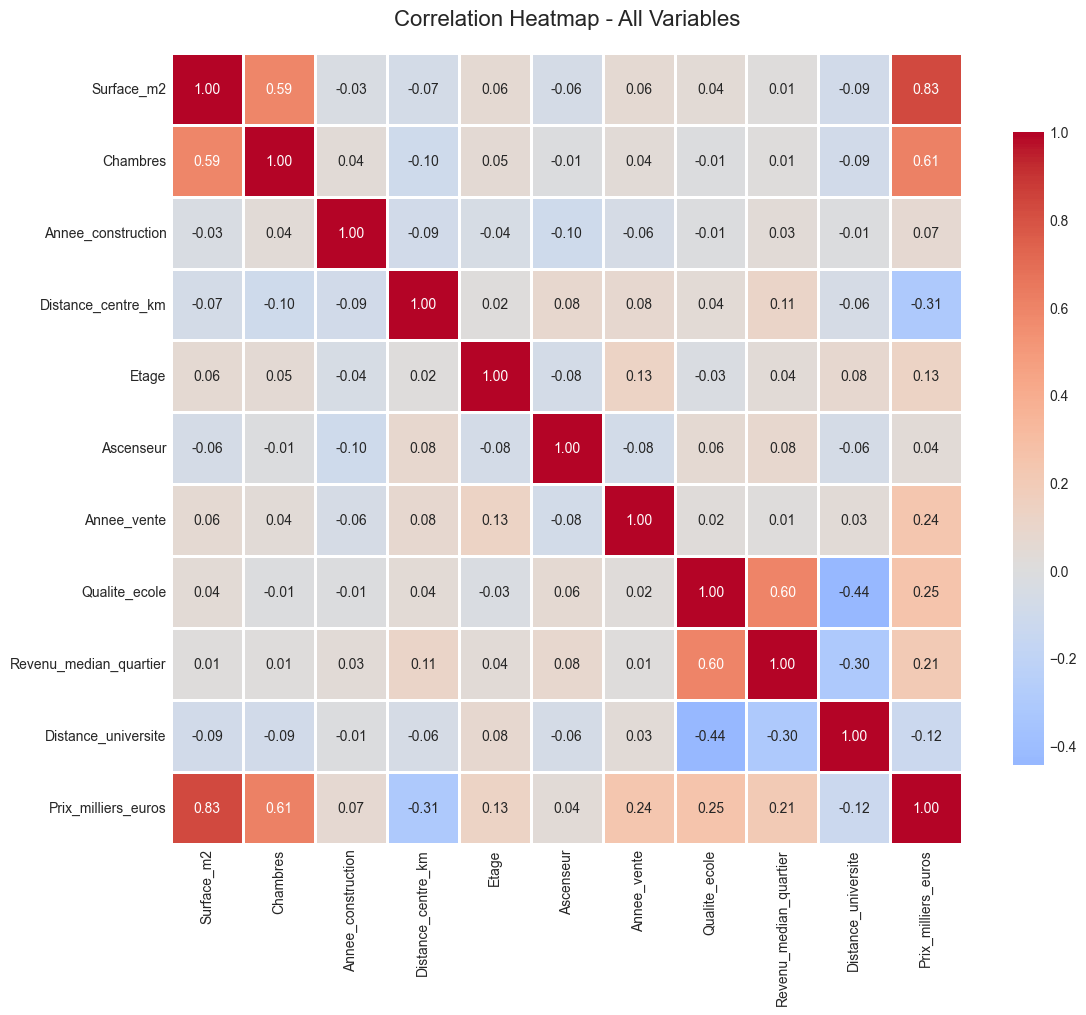


HIGH CORRELATIONS (|r| > 0.7) - Multicollinearity Risk


,Var1,Var2,Correlation
0,Surface_m2,Prix_milliers_euros,0.83



⚠️  Found 1 pairs with |correlation| > 0.7


In [6]:

# Select only numeric variables (exclude ID)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('ID')  # Remove ID as it's not meaningful

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

print("="*80)
print("CORRELATION MATRIX")
print("="*80)
display(corr_matrix.round(2))

# Correlation with target variable (Price)
print("\n" + "="*80)
print("CORRELATION WITH PRICE (sorted by absolute value)")
print("="*80)
price_corr = corr_matrix['Prix_milliers_euros'].sort_values(ascending=False)
display(price_corr)

# Heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Identify high correlations (potential multicollinearity risk)
print("\n" + "="*80)
print("HIGH CORRELATIONS (|r| > 0.7) - Multicollinearity Risk")
print("="*80)

# Extract pairs with high correlation (excluding diagonal)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Var1': corr_matrix.columns[i],
                'Var2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    display(high_corr_df.sort_values('Correlation', ascending=False, key=abs))
    print(f"\n⚠️  Found {len(high_corr_pairs)} pairs with |correlation| > 0.7")
else:
    print("✓ No pairs with |correlation| > 0.7 found")